# **1. KoBERT 모델 Fine Tunning을 위한 면접 데이터 전처리**



- 데이터 출처 : AI허브 (https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=data&dataSetSn=71592)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import json
import os
from pprint import pprint

import pandas as pd
from tqdm import tqdm

import subprocess

## (1) 데이터 로딩 및 전처리
- JSON 파일에서 면접 답변 데이터를 로드
- 감정(emotion)과 의도(intent) 데이터를 각각 추출하여 DataFrame으로 변환

In [ ]:
# 데이터셋의 경로
DATA_HOME = "/content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터"

# 학습 데이터셋 경로.
DATA_TRAINING = os.path.join(DATA_HOME, "Training")

# 검증 데이터셋 경로
DATA_VALIDATION = os.path.join(DATA_HOME, "Validation")

# DATA_HOME 디렉토리 내의 파일 목록을 출력
print(os.listdir(DATA_HOME))

['Validation', 'Training']


In [ ]:
# DATA_TRAINING과 DATA_VALIDATION 폴더 내의 zip 파일들을 압축 해제
for d in [DATA_TRAINING, DATA_VALIDATION]:
    # 라벨링데이터 폴더 내의 zip 파일 리스트를 가져옴
    zip_list = glob.glob(os.path.join(d, "02.라벨링데이터/*.zip"))

    # zip 파일 목록을 반복하며 압축 해제 작업을 수행
    for src in tqdm(zip_list):
        dest = src.replace(".zip", "")

        # 이미 압축이 풀린 경우, pass~
        if os.path.exists(dest):
            continue

        # 압축 해제 작업을 시도
        try:
            # subprocess.run을 사용하여 시스템 명령어를 실행
            subprocess.run(['unzip', '-q', src, '-d', dest], check=True)
        except subprocess.CalledProcessError as e:
            print(f"{src}의 압축을 푸는 동안 오류가 발생했습니다: {e}")

In [ ]:
flist = {}
# DATA_HOME 내의 모든 항목을 반복
for d in os.listdir(DATA_HOME):
    d_path = os.path.join(DATA_HOME, d)

    # 해당 항목이 디렉토리인지 확인
    if os.path.isdir(d_path):
        # 디렉토리 내의 모든 하위 폴더에서 .json 파일을 찾음
        json_files = glob.glob(os.path.join(d_path, "*", "*", "*.json"))

        # .json 파일이 있는 경우에만 딕셔너리에 추가
        if json_files:
            flist[d] = json_files

# 딕셔너리의 키를 출력
print(flist.keys())

dict_keys(['Validation', 'Training'])


In [ ]:
# 모든 하위 폴더에서 .json 파일 경로를 가져옴
flist = glob.glob(os.path.join(DATA_HOME, "*/*/*/*.json"))

# .json 파일의 개수를 출력
print(len(flist))

# 처음 3개의 .json 파일 경로를 출력
pprint(flist[:3])

70808
['/content/drive/MyDrive/Colab '
 'Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 '
 '데이터/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_04.RND_Female_Experienced/ckmk_d_rnd_f_e_21039.json',
 '/content/drive/MyDrive/Colab '
 'Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 '
 '데이터/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_04.RND_Female_Experienced/ckmk_d_rnd_f_e_21043.json',
 '/content/drive/MyDrive/Colab '
 'Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 '
 '데이터/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_04.RND_Female_Experienced/ckmk_d_rnd_f_e_21042.json']


#### 데이터 JSON 파일의 구조 확인


In [ ]:
# flist의 첫 3개 파일에 대해 JSON 데이터를 읽어옴
for fname in tqdm(flist[:3]):
    try:
        with open(fname, "r") as f:
            data = json.load(f)

            # "dataSet"과 "answer" 키가 존재하는지 확인
            if "dataSet" in data and "answer" in data["dataSet"]:
                print(data["dataSet"]["answer"])
            else:
                print(f"경고: {fname}에서 'dataSet' 또는 'answer' 키를 찾을 수 없습니다.")

    except json.JSONDecodeError as e:
        print(f"JSON 파일 {fname}을(를) 해독하는 중 오류가 발생했습니다: {e}")
    except Exception as e:
        print(f"파일 {fname}을(를) 처리하는 중 오류가 발생했습니다: {e}")

100%|██████████| 3/3 [00:00<00:00, 82.58it/s]

{'emotion': [{'category': 'neutral',
              'expression': 'u-fact',
              'text': '열역학 영 법칙은 열 평형 상태라고도 말하며 에이와 비 두 물체가 접촉을 했을 때 열이 높은 '
                      '쪽에   물체가 열이 낮은 쪽으로 이제 열이 이동하는 것을 말합니다.'},
             {'category': 'neutral',
              'expression': 'u-fact',
              'text': '그래서 두 개 두 개의 물체가   동일한 열을 가지는 것을 말합니다.'}],
 'intent': [{'category': 'attitude', 'expression': '', 'text': ''}],
 'raw': {'text': '열역학 영 법칙은 열 평형 상태라고도 말하며 에이와 비 두 물체가 접촉을 했을 때 열이 높은 쪽에 물체가 '
                 '열이 낮은 쪽으로 이제 열이 이동하는 것을 말합니다. 그래서 두 개 두 개의 물체가 동일한 열을 가지는 것을 '
                 '말합니다.',
         'wordCount': 37},
 'summary': {'text': '열역학 영 법칙은 물체가 접촉을 했을 때 열이 높은 쪽으로 물체가 열이 낮은 쪽으로 이동하여 동일한 '
                     '열을 가지는 것을 말합니다.',
             'wordCount': 20}}
{'emotion': [],
 'intent': [{'category': 'attitude', 'expression': '', 'text': ''}],
 'raw': {'text': '앞으로 더 연구하고 싶은 분야는 기계 설계입니다. 제가 지금 하고 있는 분야에서 기계설계는 가장 중요한 '
                 '요소이며 또 다양한 규격들이 있으면 이 규격들을 충

#### 파일에서 읽고 DataFrame 생성
- flist에 포함된 JSON 파일에서 감정(emotion)과 의도(intent) 데이터를 추출하여 emotion_answers와 intent_answers라는 딕셔너리에 저장하는 작업을 수행

In [ ]:
emotion_answers = {
    "Training": [],
    "Validation": [],
}
intent_answers = {
    "Training": [],
    "Validation": [],
}

for fname in tqdm(flist, total=len(flist)):
    kind = fname.replace(DATA_HOME + "/", "").split("/")[0]

    with open(fname, "r") as f:
        try:
            data = json.load(f)["dataSet"]["answer"]

            # 감정 데이터 처리
            for e in data.get("emotion", []):
                if e["text"]:
                    emotion_answers[kind].append(
                        [e["text"], e["category"], e["expression"]]
                    )

            # 의도 데이터 처리
            for e in data.get("intent", []):
                if e["text"]:
                    intent_answers[kind].append(
                        [e["text"], e["category"], e["expression"]]
                    )

        except Exception as e:
            print(f"파일 {fname}을(를) 처리하는 중 오류가 발생했습니다: {e}")


  4%|▍         | 2862/70808 [00:07<03:03, 371.27it/s]

파일 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_06.Design_Female_Experienced/ckmk_d_ard_f_e_66661.json을(를) 처리하는 중 오류가 발생했습니다: Invalid control character at: line 34 column 165 (char 1573)


  9%|▉         | 6655/70808 [00:18<02:50, 376.49it/s]

파일 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_01.Management_Female_New/ckmk_d_bm_f_n_161564.json을(를) 처리하는 중 오류가 발생했습니다: Invalid control character at: line 23 column 100 (char 688)


 13%|█▎        | 9410/70808 [07:54<5:21:00,  3.19it/s]

파일 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_01.Management_Female_New/ckmk_d_bm_f_n_178194.json을(를) 처리하는 중 오류가 발생했습니다: Invalid control character at: line 23 column 135 (char 755)


 15%|█▍        | 10510/70808 [13:59<5:36:20,  2.99it/s]

파일 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_01.Management_Female_New/ckmk_d_bm_f_n_269424.json을(를) 처리하는 중 오류가 발생했습니다: Invalid control character at: line 23 column 571 (char 1132)


 24%|██▎       | 16811/70808 [16:53<02:26, 367.41it/s]

파일 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/Dataset/129.채용면접 인터뷰 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_05.ICT_Male_New/ckmk_d_ict_m_n_337139.json을(를) 처리하는 중 오류가 발생했습니다: Expecting property name enclosed in double quotes: line 22 column 21 (char 576)


100%|██████████| 70808/70808 [19:29<00:00, 60.54it/s] 


In [ ]:
emotion_answers_df = {}
for k, v in emotion_answers.items():
    emotion_answers_df[k] = pd.DataFrame(
        v, columns=["document", "category", "expression"]
    )

# emotion_answers_df 딕셔너리를 반환하여 확인
emotion_answers_df

{'Training':                                                 document  category  \
 0      네 당시 모델하우스에 아르바이트를 하던 중이었고 해당 아르바이트를 하던 도중 어떤 ...   neutral   
 1      애자일 기법은 유연성과 스피드 짧은 시간에 전력 질주를 요하는 딜리버리 사이클이 짧...   neutral   
 2                             워터폴 기법은 매우 연속적인 성격의 기법입니다.   neutral   
 3      인생의 모든 경험은 전부 실패나 어떤 어 날리는 기회가 아닌 자산으로 여겨지는 그런...   neutral   
 4      어 마케팅 회사와 협업을 해서 어 저희 회사의 마케팅 전략을 다시 세우고   또 실...   neutral   
 ...                                                  ...       ...   
 14771  그래서 다른 공부를 열심히 했는데 그 체플을 못함으로써 졸업을 못한다고 하니까 너무...  negative   
 14772      그래서 정말 힘들었는데 교회를 다니면서 그 교회 사람들이랑 좀 친하게 지냈거든요.  positive   
 14773  보니 이런 분야가 너무 재밌고 그런 관심이 계속 이어졌기 때문에 이쪽 분야로 지원하...  positive   
 14774      저는 이쪽 분야에 꾸준히 관심을 가졌던 사람으로서 꼭 합격해서 근무하고 싶습니다.  positive   
 14775       어 이런 일이 일단 표면적으로만 보면 굉장히 씁쓸하고 슬픈 일이라고 보여집니다.  positive   
 
         expression  
 0           u-fact  
 1           u-fact  
 2           u-fact  
 3         u-belief  
 4           u-fact  
 .

In [ ]:
intent_answers_df = {}
for k, v in intent_answers.items():
    intent_answers_df[k] = pd.DataFrame(
        v, columns=["document", "category", "expression"]
    )

# intent_answers_df 딕셔너리를 반환하여 확인
intent_answers_df

{'Training':                                                 document     category  \
 0                  저는 늘 여러 사람에게 해당 문제를 터놓고 조언을 구하는 편입니다.   background   
 1      저는 광고 기획자로서 전 세계 최고가 되고 싶은 마음이 있고 그런 포부를 안고 귀사...          etc   
 2      그래서 서로 이제 마음을 터놓고 이 부분을 해결해 보자 제가 팀장이로 팀장으로서 그...  personality   
 3           광고 기획자로서 세계 최고로 자리하기 자리매김하기 위해 귀사에 지원을 했습니다.          etc   
 4      인생의 모든 경험은 전부 실패나 어떤 어 날리는 기회가 아닌 자산으로 여겨지는 그런...   background   
 ...                                                  ...          ...   
 26013                       저는 원래 좀 치밀하고 계획적인 성격을 갖고 있다.   background   
 26014  네 고객이 만족할 만한 서비스를 제공하기 위해서는 음 제가 생각했을 때 가장 먼저 ...   technology   
 26015  그래서 가장 그 적합한 유저 적합한 고객에 대해서 미리 파악하고 굉장히 세분화된 그...   technology   
 26016  물론 서비스에 대하서 시행됐을 때 그 반응과 피드백을 즉각적으로 음 다시 한번 그 ...   technology   
 26017  어 미리 좀 구현된 시스템이 기반이 되어 있다면 어떤 문제가 발생했을 때 그것을 바...   technology   
 
           expression  
 0           c_person  
 1      c_sincere_job  
 2         c_confl_mg  
 3

## (2) 레이블 인코딩
- 감정과 의도 카테고리에 대해 정수 레이블을 할당
- 이를 통해 텍스트 레이블을 숫자로 변환하여 모델 학습에 사용할 수 있게 함


In [ ]:
# 'Training' DataFrame에서 'category'와 'expression' 기준으로 그룹화하고 각 그룹의 크기를 계산
grouped_counts = emotion_answers_df["Training"].groupby(by=["category", "expression"]).size()

# 결과를 출력
print(grouped_counts)

category  expression   
negative  n-anger           107
          n-anxiety         287
          n-distress       1008
          n-shame           141
neutral   u-belief          847
          u-fact           5524
positive  n-sadness         285
          p-achievement    1037
          p-affection       884
          p-gratitude       206
          p-happiness      1361
          p-interest       3089
dtype: int64


In [ ]:
# 'Training' DataFrame에서 'category'와 'expression' 기준으로 그룹화하고 각 그룹의 크기를 계산하여 DataFrame으로 변환
emotion_labels = (
    emotion_answers_df["Training"]
    .groupby(by=["category", "expression"])
    .size()
    .to_frame(name="count")  # 컬럼 이름 설정
    .reset_index()           # 인덱스를 리셋하여 컬럼으로 변환
)

# 인덱스를 'label' 컬럼으로 추가
emotion_labels["label"] = emotion_labels.index

# 결과를 출력
print(emotion_labels)

    category     expression  count  label
0   negative        n-anger    107      0
1   negative      n-anxiety    287      1
2   negative     n-distress   1008      2
3   negative        n-shame    141      3
4    neutral       u-belief    847      4
5    neutral         u-fact   5524      5
6   positive      n-sadness    285      6
7   positive  p-achievement   1037      7
8   positive    p-affection    884      8
9   positive    p-gratitude    206      9
10  positive    p-happiness   1361     10
11  positive     p-interest   3089     11


In [ ]:
# 'Training' DataFrame과 'emotion_labels' DataFrame을 'category'와 'expression' 컬럼을 기준으로 병합
merged_df = pd.merge(emotion_answers_df["Training"], emotion_labels, on=["category", "expression"])

# 병합 결과를 출력하여 확인
print(merged_df)

                                                document  category  \
0      네 당시 모델하우스에 아르바이트를 하던 중이었고 해당 아르바이트를 하던 도중 어떤 ...   neutral   
1      애자일 기법은 유연성과 스피드 짧은 시간에 전력 질주를 요하는 딜리버리 사이클이 짧...   neutral   
2                             워터폴 기법은 매우 연속적인 성격의 기법입니다.   neutral   
3      어 마케팅 회사와 협업을 해서 어 저희 회사의 마케팅 전략을 다시 세우고   또 실...   neutral   
4      왜냐하면 저는 대학 시절 때부터 아르바이트로 간단한 견적서와 계약서를 작성하는   ...   neutral   
...                                                  ...       ...   
14771  그래서 그때 그런 마음을 먹고 집을 구할 때 정말 뭐 크지는 않지만 햇빛이 잘 들어...  positive   
14772  그래서 특별한 면접 준비보다는 나를 돌아보는 시간이 되어서 너무 좋았고 내가 어떤 ...  positive   
14773  그리고 책을 통해서 얻어지는 이런 것들로 인하여 나의 마음도 좀 더 차분해지고 나를...  positive   
14774  그럴 때 그분을 도와서 조금 앞에 제가 조금 도와주고 그 뒤에 이어서 할 수 있게 ...  positive   
14775  또 저의 또 어떤 그 어 비전을 보면서 따라와준 후배들한테도 굉장히 고맙게 생각하고...  positive   

        expression  count  label  
0           u-fact   5524      5  
1           u-fact   5524      5  
2           u-fact   5524      5  
3           u-fact 

In [ ]:
# 'Training' DataFrame에서 'category'와 'expression' 기준으로 그룹화하고 각 그룹의 크기를 계산
grouped_counts = intent_answers_df["Training"].groupby(by=["category", "expression"]).size()

# 결과를 출력하여 확인
print(grouped_counts)

category     expression   
attitude     d_creative         41
             d_express          30
             d_sens            148
             f_cons            139
             f_pat              49
             f_resp             45
             i_hwsw_prfi       224
             i_secty            71
             i_tech_orien       72
             m_critical        130
             m_direct           40
             m_holistic         59
             p_cus_orien       192
             p_ethic            70
             p_proac            79
             r_info_col         48
             r_prof            240
             r_prsv             42
             s_comn            205
             s_intp            277
             s_pers             74
background   c_person         4317
             c_private        4393
             c_value          1125
etc          c_sincere_co      481
             c_sincere_job    1462
personality  c_adp             638
             c_chl          

In [ ]:
# 'Training' DataFrame에서 'category'와 'expression' 기준으로 그룹화하고 각 그룹의 크기를 계산하여 DataFrame으로 변환
intent_labels = (
    intent_answers_df["Training"]
    .groupby(by=["category", "expression"])
    .size()
    .to_frame(name="count")  # 컬럼 이름 설정
    .reset_index()           # 인덱스를 리셋하여 컬럼으로 변환
)

# 인덱스를 'label' 컬럼으로 추가
intent_labels["label"] = intent_labels.index

# 결과를 출력하여 확인
print(intent_labels)

       category     expression  count  label
0      attitude     d_creative     41      0
1      attitude      d_express     30      1
2      attitude         d_sens    148      2
3      attitude         f_cons    139      3
4      attitude          f_pat     49      4
5      attitude         f_resp     45      5
6      attitude    i_hwsw_prfi    224      6
7      attitude        i_secty     71      7
8      attitude   i_tech_orien     72      8
9      attitude     m_critical    130      9
10     attitude       m_direct     40     10
11     attitude     m_holistic     59     11
12     attitude    p_cus_orien    192     12
13     attitude        p_ethic     70     13
14     attitude        p_proac     79     14
15     attitude     r_info_col     48     15
16     attitude         r_prof    240     16
17     attitude         r_prsv     42     17
18     attitude         s_comn    205     18
19     attitude         s_intp    277     19
20     attitude         s_pers     74     20
21   backg

## (3) TSV 파일로 저장
- 전처리된 데이터를 TSV(Tab-Separated Values) 형식으로 저장
- TSV: KoBERT 모델 학습에 사용하기 적합한 형식


In [ ]:
# 저장할 디렉토리 경로
save_dir = "/content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/data"

# 데이터 저장 디렉토리 생성 (존재하지 않을 경우)
os.makedirs(save_dir, exist_ok=True)

# emotion_answers_df 딕셔너리의 각 DataFrame과 emotion_labels를 병합하여 TSV 파일로 저장
for k, v in emotion_answers_df.items():
    # DataFrame 병합
    merged_df = pd.merge(v, emotion_labels, on=["category", "expression"])

    # 불필요한 컬럼 삭제
    merged_df = merged_df.drop(columns=["category", "expression"])

    # TSV 파일로 저장
    merged_df.to_csv(
        os.path.join(save_dir, f"emotion_answers_{k}.tsv"), sep="\t", index_label="id", encoding="utf-8"
    )

# emotion_labels DataFrame을 TSV 파일로 저장
emotion_labels.to_csv(
    os.path.join(save_dir, "emotion_labels.tsv"), sep="\t", index=False, encoding="utf-8"
)

In [ ]:
import os
import pandas as pd

# 저장할 디렉토리 경로
save_dir = "/content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/data"

# 데이터 저장 디렉토리 생성 (존재하지 않을 경우)
os.makedirs(save_dir, exist_ok=True)

# intent_answers_df 딕셔너리의 각 DataFrame과 intent_labels를 병합하여 TSV 파일로 저장
for k, v in intent_answers_df.items():
    # DataFrame 병합
    merged_df = pd.merge(v, intent_labels, on=["category", "expression"])

    # 불필요한 컬럼 삭제
    merged_df = merged_df.drop(columns=["category", "expression"])

    # TSV 파일로 저장
    merged_df.to_csv(
        os.path.join(save_dir, f"intent_answers_{k}.tsv"), sep="\t", index_label="id", encoding="utf-8"
    )

# intent_labels DataFrame을 TSV 파일로 저장
intent_labels.to_csv(
    os.path.join(save_dir, "intent_labels.tsv"), sep="\t", index=False, encoding="utf-8"
)

In [ ]:
# intent_labels 데이터 로드
intent_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/data/intent_labels.tsv", sep="\t", encoding="utf8")
intent_labels

,category,expression,label
0,attitude,d_creative,0
1,attitude,d_express,1
2,attitude,d_sens,2
3,attitude,f_cons,3
4,attitude,f_pat,4
5,attitude,f_resp,5
6,attitude,i_hwsw_prfi,6
7,attitude,i_secty,7
8,attitude,i_tech_orien,8
9,attitude,m_critical,9


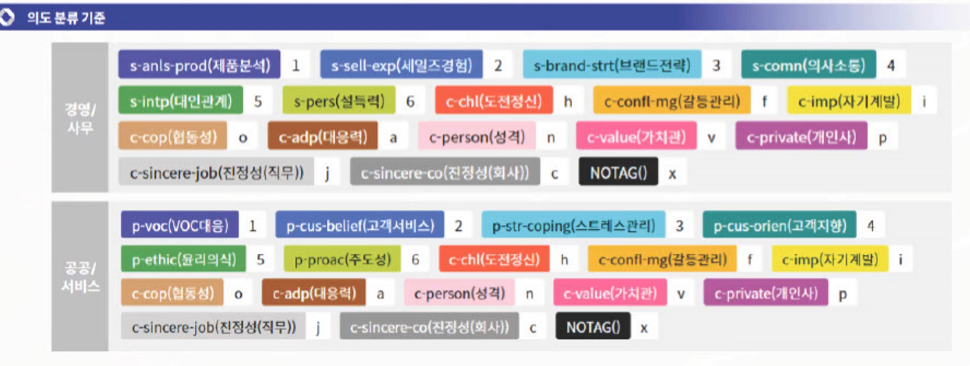

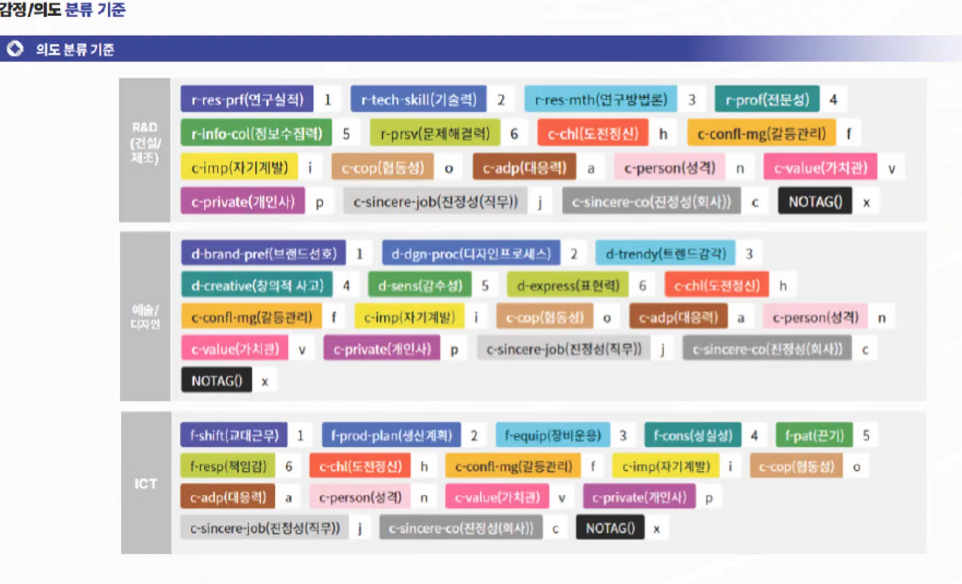

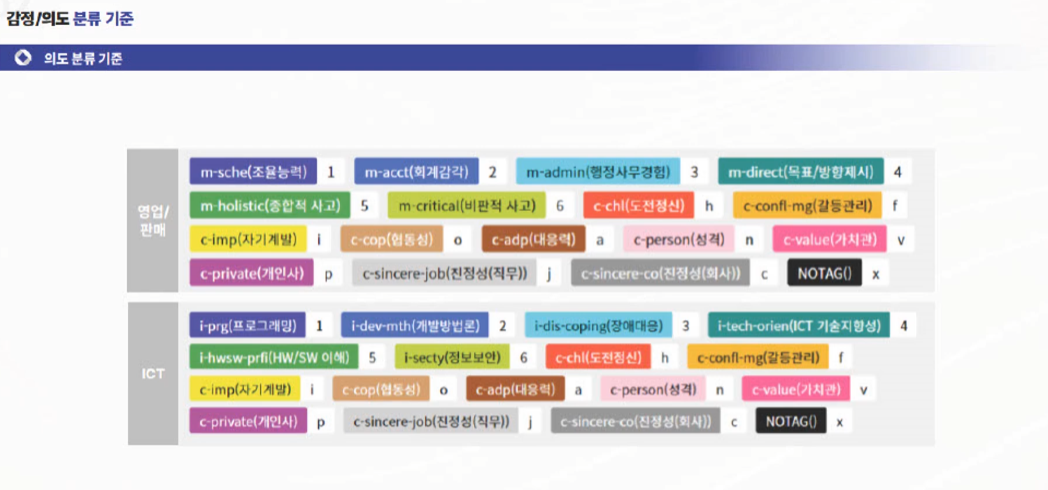

In [ ]:
# description과 job 딕셔너리 생성
description_dict = {
    'd_creative': '창의적 사고', 'd_express': '표현력', 'd_sens': '감수성',
    'f_cons': '성실성', 'f_pat': '끈기', 'f_resp': '책임감',
    'i_hwsw_prfi': 'HW/SW 이해', 'i_secty': '정보보안', 'i_tech_orien': 'ICT 기술 지향성',
    'm_critical': '비판적 사고', 'm_direct': '목표/방향 제시', 'm_holistic': '총괄적 사고',
    'p_cus_orien': '고객지향', 'p_ethic': '윤리의식', 'p_proac': '주도성',
    'r_info_col': '정보수집력', 'r_prof': '전문성', 'r_prsv':'문제해결력','s_comn': '의사소통',
    's_intp': '대인관계', 's_pers': '성과', 'c_person': '성격',
    'c_private': '개인사', 'c_value': '가치관', 'c_sincere_co': '진정성(회사)',
    'c_sincere_job': '진정성(직무)', 'c_adp': '대응력', 'c_chl': '도전정신',
    'c_confl_mg': '갈등관리', 'c_cop': '협동성', 'c_imp': '자기계발',
    'd_brand_pref': '브랜드 선호', 'd_dgn_proc': '디자인 프로세스', 'd_trendy': '트렌드 감각',
    'f_equip': '장비운용', 'f_prod_plan': '생산계획', 'f_shift': '교대근무',
    'i_dev_mth': '개발 방법론', 'i_dis_coping': '장애 대응', 'i_prg': '프로그래밍',
    'm_acct': '회계감각', 'm_admin': '행정사무 경험', 'm_sche': '조율 능력',
    'p_cus_belief': '고객 서비스', 'p_str_coping': '스트레스 관리', 'p_voc': 'VOC 대응',
    'r_res_mth': '연구방법론', 'r_res_prf': '연구실적', 'r_tech_skill': '기술력',
    's_anls_prod': '제품 분석', 's_brand_strt': '브랜드 전략', 's_sell_exp': '세일즈 경험'
}

job_dict = {
    'd_creative': '예술/디자인', 'd_express': '예술/디자인', 'd_sens': '예술/디자인',
    'f_cons': '제조/생산', 'f_pat': 'R&D(개발/제조)', 'f_resp': '제조/생산',
    'i_hwsw_prfi': 'ICT', 'i_secty': 'ICT', 'i_tech_orien': 'ICT',
    'm_critical': '영업/판매', 'm_direct': '영업/판매', 'm_holistic': '영업/판매',
    'p_cus_orien': '공공/서비스', 'p_ethic': '공공/서비스', 'p_proac': '공공/서비스',
    'r_info_col': 'R&D(개발/제조)', 'r_prof': 'R&D(개발/제조)', 'r_prsv':'R&D(개발/제조)','s_comn': '경영/사무',
    's_intp': '경영/사무', 's_pers': '경영/사무', 'c_person': '전 직무',
    'c_private': '전 직무', 'c_value': '전 직무', 'c_sincere_co': '전 직무',
    'c_sincere_job': '전 직무', 'c_adp': '전 직무', 'c_chl': '전 직무',
    'c_confl_mg': '전 직무', 'c_cop': '전 직무', 'c_imp': '전 직무',
    'd_brand_pref': '예술/디자인', 'd_dgn_proc': '예술/디자인', 'd_trendy': '예술/디자인',
    'f_equip': '제조/생산', 'f_prod_plan': '제조/생산', 'f_shift': '제조/생산',
    'i_dev_mth': 'ICT', 'i_dis_coping': 'ICT', 'i_prg': 'ICT',
    'm_acct': '영업/판매', 'm_admin': '영업/판매', 'm_sche': '영업/판매',
    'p_cus_belief': '공공/서비스', 'p_str_coping': '공공/서비스', 'p_voc': '공공/서비스',
    'r_res_mth': 'R&D(개발/제조)', 'r_res_prf': 'R&D(개발/제조)', 'r_tech_skill': 'R&D(개발/제조)',
    's_anls_prod': '경영/사무', 's_brand_strt': '경영/사무', 's_sell_exp': '경영/사무'
}

In [ ]:
# full_intent_labels 데이터 생성
full_intent_labels = intent_labels.copy()
full_intent_labels['description'] = full_intent_labels['expression'].map(description_dict)
full_intent_labels['job'] = full_intent_labels['expression'].map(job_dict)

print(f"full_intent_labels 길이: {len(full_intent_labels)}")
print(full_intent_labels.head())

# 누락된 값이 있는지 확인
print("\n누락된 값:")
print(full_intent_labels.isnull().sum())

full_intent_labels 길이: 52
   category  expression  label description         job
0  attitude  d_creative      0      창의적 사고      예술/디자인
1  attitude   d_express      1         표현력      예술/디자인
2  attitude      d_sens      2         감수성      예술/디자인
3  attitude      f_cons      3         성실성       제조/생산
4  attitude       f_pat      4          끈기  R&D(개발/제조)

누락된 값:
category       0
expression     0
label          0
description    0
job            0
dtype: int64


In [ ]:
full_intent_labels

,category,expression,label,description,job
0,attitude,d_creative,0,창의적 사고,예술/디자인
1,attitude,d_express,1,표현력,예술/디자인
2,attitude,d_sens,2,감수성,예술/디자인
3,attitude,f_cons,3,성실성,제조/생산
4,attitude,f_pat,4,끈기,R&D(개발/제조)
5,attitude,f_resp,5,책임감,제조/생산
6,attitude,i_hwsw_prfi,6,HW/SW 이해,ICT
7,attitude,i_secty,7,정보보안,ICT
8,attitude,i_tech_orien,8,ICT 기술 지향성,ICT
9,attitude,m_critical,9,비판적 사고,영업/판매


In [ ]:
import os
import pandas as pd

# 저장할 디렉토리 경로
save_dir = "/content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/data"

# 데이터 저장 디렉토리 생성 (존재하지 않을 경우)
os.makedirs(save_dir, exist_ok=True)

# full_labels DataFrame을 TSV 파일로 저장
full_intent_labels.to_csv(
    os.path.join(save_dir, "full_intent_labels.tsv"), sep="\t", index=False, encoding="utf-8"
)

print(f"full_intent_labels가 {os.path.join(save_dir, 'full_intent_labels.tsv')}에 저장되었습니다.")

full_intent_labels가 /content/drive/MyDrive/Colab Notebooks/Project(InterviewData-Analysis)/data/full_intent_labels.tsv에 저장되었습니다.
